In [89]:
import pandas as pd
import numpy as np 

#Import the data into 'df' - the dataframe
df = pd.read_csv(r'C:\Users\Andrew\OneDrive - University of Connecticut\Desktop\Stat4188-Final\alzheimer.csv')
dfClassifiers = pd.read_csv(r'C:\Users\Andrew\OneDrive - University of Connecticut\Desktop\Stat4188-Final\alzheimer.csv')
df.shape

(373, 10)

In [90]:
#Data Cleaning
df.head()

#Check for missing values and types of variables
nan_vals = df.isna().sum()
print(nan_vals, df.dtypes)

sesColumn = df['SES']
print(sesColumn)


Group     0
M/F       0
Age       0
EDUC      0
SES      19
MMSE      2
CDR       0
eTIV      0
nWBV      0
ASF       0
dtype: int64 Group     object
M/F       object
Age        int64
EDUC       int64
SES      float64
MMSE     float64
CDR      float64
eTIV       int64
nWBV     float64
ASF      float64
dtype: object
0      2.0
1      2.0
2      NaN
3      NaN
4      NaN
      ... 
368    1.0
369    1.0
370    2.0
371    2.0
372    2.0
Name: SES, Length: 373, dtype: float64


In [91]:
# Data Cleaning - Part 2
df.dropna(inplace=True)
df.shape
    

(354, 10)

Text(0, 0.5, 'Count')

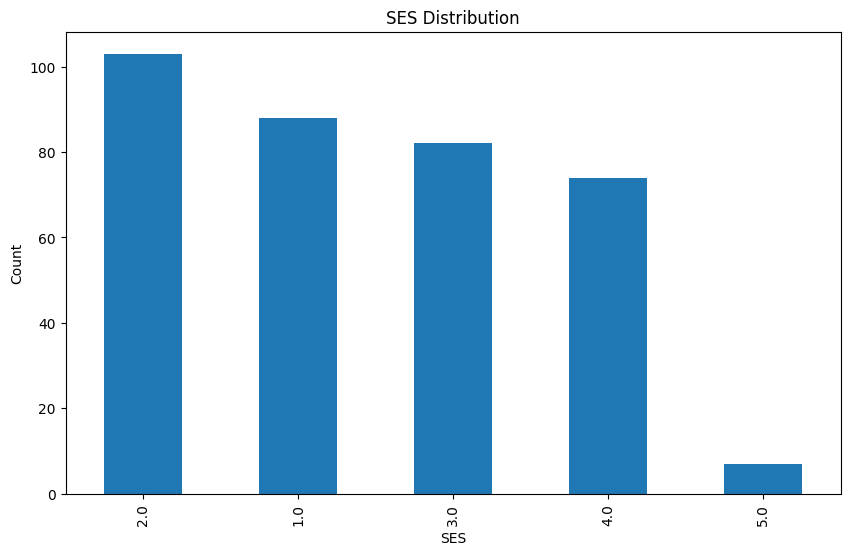

In [92]:
# Data Visualization Part 1
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm 
plt.figure(figsize=(10,6))
df['SES'].value_counts().plot(kind='bar')
plt.title('SES Distribution')
plt.xlabel('SES')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

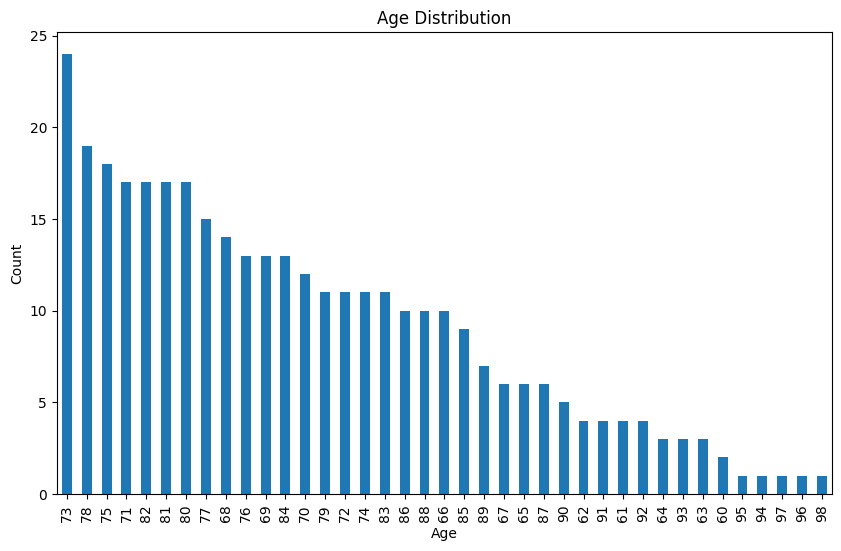

In [93]:
# Data Visualization Part 2

plt.figure(figsize=(10,6))
df['Age'].value_counts().plot(kind='bar')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

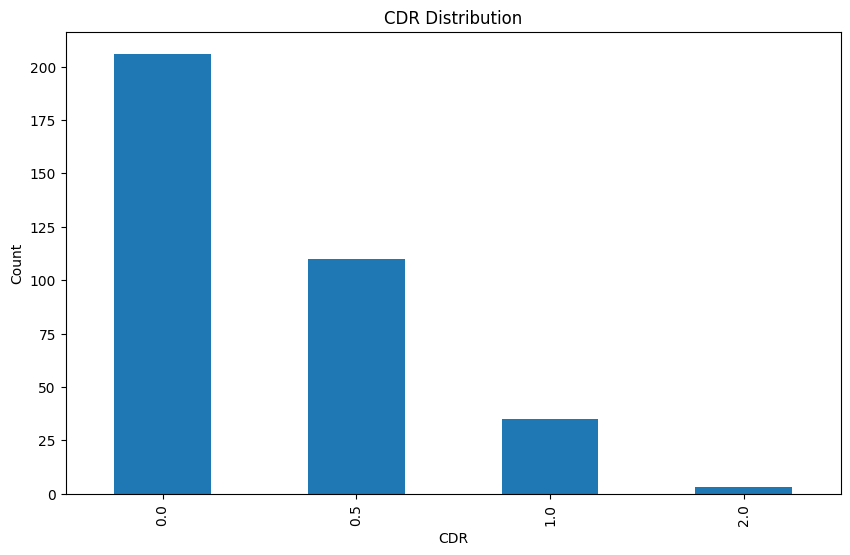

In [94]:
# Data Visualization Part 3

plt.figure(figsize=(10,6))
df['CDR'].value_counts().plot(kind='bar')
plt.title('CDR Distribution')
plt.xlabel('CDR')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

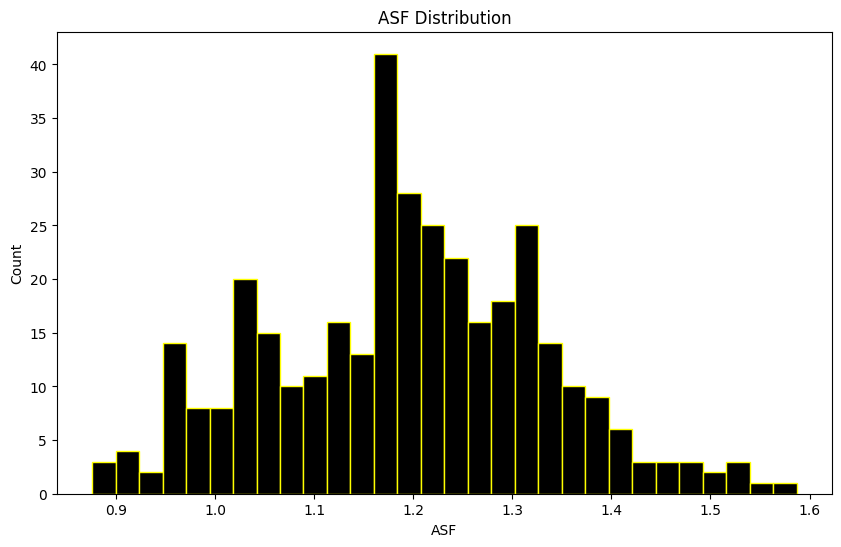

In [95]:
# Data Visualization Part 4

plt.figure(figsize=(10,6))
plt.hist(df['ASF'], bins=30, color='black', edgecolor='yellow')
plt.title('ASF Distribution')
plt.xlabel('ASF')
plt.ylabel('Count')


Text(0, 0.5, 'Count')

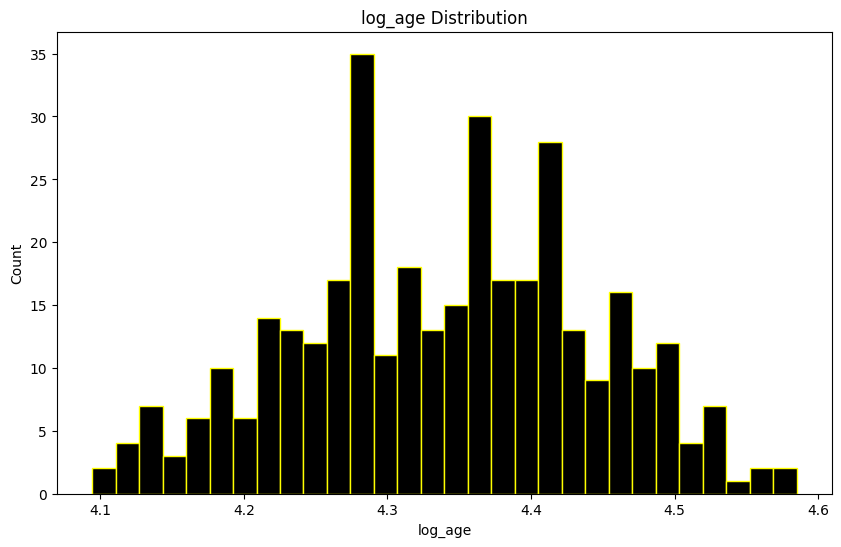

In [96]:
# Data Transformation
df['log_age'] = np.log(df['Age'])
plt.figure(figsize=(10,6))
plt.hist(df['log_age'], bins=30, color='black', edgecolor='yellow')
plt.title('log_age Distribution')
plt.xlabel('log_age')
plt.ylabel('Count')


In [97]:
# Data Transformation 2
# transforming gender
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
encoder = OneHotEncoder()
print(df.isna().sum())
#df.drop(['Group_Converted', 'Group_Demented', 'Group_Nondemented', 'M/F_F', 'M/F_M'], axis=1, inplace=True)
categorical = df.select_dtypes(include=['object']).columns.tolist()
# Select the categorical columns
# Create an instance of LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to the categorical columns
df['M/F'] = le.fit_transform(df['M/F'])
df['Group'] = le.fit_transform(df['Group'])
print(df.dtypes)
#dfFinal = pd.concat([df, dfEncoded], axis=1)

Group      0
M/F        0
Age        0
EDUC       0
SES        0
MMSE       0
CDR        0
eTIV       0
nWBV       0
ASF        0
log_age    0
dtype: int64
Group        int32
M/F          int32
Age          int64
EDUC         int64
SES        float64
MMSE       float64
CDR        float64
eTIV         int64
nWBV       float64
ASF        float64
log_age    float64
dtype: object


In [98]:
# Data Modeling 1
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score


In [99]:
# Linear Regression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
df1 = df.copy()
y=df1['CDR']
X=df1.drop(['CDR', 'Group'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lrModel = LinearRegression()
lrModel.fit(X_train, y_train)
ypred = lrModel.predict(X_test)
mse = mean_squared_error(y_test, lrModel.predict(X_test))
r2 = r2_score(y_test, ypred)
mae = mean_absolute_error(y_test, ypred)
print(mse, r2, mae)

0.04395935700773215 0.6067451310098 0.1718803203208284


In [100]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
# dfClassifiers
df3 = df.copy()


y2=df3['CDR']
X2=df3.drop(['CDR', 'M/F', 'Group'], axis=1)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X2, y2, test_size=0.2, random_state=0)

clf=DecisionTreeRegressor()

clf=clf.fit(X_train1, y_train1)
y_pred2=clf.predict(X_test1)

mse2= mean_squared_error(y_test1, y_pred2)
r2_2= r2_score(y_test1, y_pred2)
mae2 = mean_absolute_error(y_test1, y_pred2)
print(mse2, r2_2, mae2)


0.07746478873239436 0.30700976042590966 0.14084507042253522


In [101]:
# Random Forest
df4 = df.copy()


y3=df4['CDR']
x3=df4.drop(['CDR', 'M/F', 'Group'], axis=1)

X_train2, X_test2, y_train2, y_test2 = train_test_split(x3, y3, test_size=0.2, random_state=0)

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf = rf.fit(X_train2, y_train2)

y_pred3 = rf.predict(X_test2)
mse3 = mean_squared_error(y_test2, y_pred3)
r2_3 = r2_score(y_test2, y_pred3)
mae3 = mean_absolute_error(y_test2, y_pred3)
print(mse3, r2_3, mae3)

0.04134718309859155 0.6301133096716949 0.1532394366197183


In [103]:
# Gradient Boosted

df5 = df.copy()

print(df5.isna().sum())
y4=df5['CDR']
X4=df5.drop(['CDR', 'M/F', 'Group'], axis=1)

X_train3, X_test3, y_train3, y_test3 = train_test_split(X4, y4, test_size=0.2, random_state=0)

from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators=100, random_state=0)
gb = gb.fit(X_train3, y_train3)

y_pred4=gb.predict(X_test3)

mse4= mean_squared_error(y_test3, y_pred4)
r2_4= r2_score(y_test3, y_pred4)
mae4=mean_absolute_error(y_test3, y_pred4)

print(mse4, r2_4, mae4)


Group      0
M/F        0
Age        0
EDUC       0
SES        0
MMSE       0
CDR        0
eTIV       0
nWBV       0
ASF        0
log_age    0
dtype: int64
0.045135865763303605 0.5962202319204731 0.16846508519699957
